## Machine Learning Algorithms on twitter + Indigo data for the year 2019

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [2]:
df = pd.read_csv("fit_data_twitter.csv") 

In [3]:
df

,D_Airport Rating,D_Airport On Time Rating,D_Airport Service Rating,A_Airport Rating,A_Airport On Time Rating,A_Airport Service Rating,D_Delay,Duration,A_Delay,C_Rating,...,A_tempC,A_visibility,A_winddirDegree,A_windspeedKmph,A_Time,day,month,polarity,subjectivity,tweet_volume
0,7.50,8.6,9.2,7.29,6.2,9.0,3.0,73.0,-29.0,7.9,...,28.0,10.0,344.0,6.0,6.0,4,2,0.10000,0.154167,3
1,7.50,8.6,9.2,7.29,6.2,9.0,3.0,73.0,-29.0,7.9,...,28.0,10.0,344.0,6.0,6.0,4,2,0.10000,0.154167,3
2,7.50,8.6,9.2,7.29,6.2,9.0,3.0,73.0,-29.0,7.9,...,28.0,10.0,344.0,6.0,6.0,4,2,0.10000,0.154167,3
3,7.00,8.5,8.7,7.99,7.3,9.1,14.0,129.0,-7.0,7.9,...,32.0,10.0,288.0,4.0,8.0,4,2,0.10000,0.154167,3
4,7.00,8.5,8.7,7.99,7.3,9.1,14.0,129.0,-7.0,7.9,...,32.0,10.0,288.0,4.0,8.0,4,2,0.10000,0.154167,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,7.50,8.6,9.2,7.99,7.3,9.1,14.0,153.0,-3.0,7.9,...,14.0,10.0,283.0,8.0,6.0,20,1,0.09375,0.218750,1
1367,7.29,6.2,9.0,7.99,7.3,9.1,12.0,105.0,-22.0,7.9,...,14.0,10.0,288.0,9.0,8.0,20,1,0.09375,0.218750,1
1368,7.00,8.5,8.7,7.99,7.3,9.1,9.0,130.0,-11.0,7.9,...,19.0,10.0,187.0,4.0,8.0,20,1,0.09375,0.218750,1
1369,7.00,8.5,8.7,7.99,7.3,9.1,0.0,131.0,-29.0,7.9,...,14.0,10.0,286.0,8.0,7.0,20,1,0.09375,0.218750,1


## Outlier Detection

C:\Users\Pooja\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pooja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


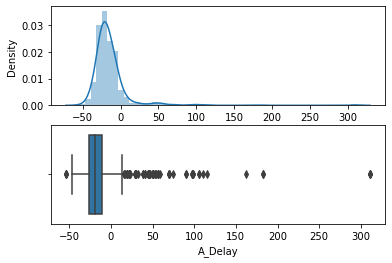

In [4]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)
plot(df,'A_Delay')

## Replace Outliers with median of delay values

C:\Users\Pooja\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pooja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


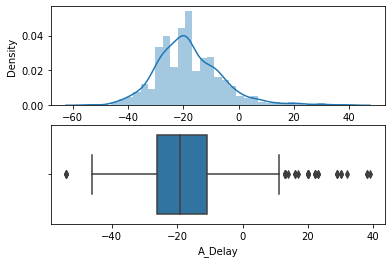

In [7]:
df['A_Delay']=np.where(df['A_Delay']>=40,df['A_Delay'].median(),df['A_Delay'])
plot(df,'A_Delay')

## Seperate the dataset in X and Y columns

In [10]:
y=df['A_Delay']
X=df.drop('A_Delay',axis=1)

## Feature Selection

In [11]:
from sklearn.feature_selection import mutual_info_classif

In [13]:
imp = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
D_Delay,0.676388
Duration,0.617540
D_winddirDegree,0.574894
A_winddirDegree,0.563702
D_humidity,0.493740
A_humidity,0.472714
A_DewPointC,0.426319
D_cloudcover,0.416491
D_tempC,0.412767
subjectivity,0.396531


### Observably features A_precipMM and D_precipMM are contributing the least to the target variable prediction
### We keep them for the time being

## Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=10)

In [15]:
mmscaler=MinMaxScaler(feature_range=(0,1))
X_train=mmscaler.fit_transform(X_train)
X_test=mmscaler.fit_transform(X_test)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)  

In [19]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
res=pd.DataFrame(a)

In [16]:
# Model libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [17]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
bg = BaggingRegressor()
ran = RandomForestRegressor()
svr = SVR()
xgr = xgb.XGBRegressor()
knn = KNeighborsRegressor(n_neighbors=5)
etr = ExtraTreesRegressor()
re=Ridge()
lin_lasso=linear_model.Lasso(alpha=0.1)

In [18]:
m=[lr, dt, bg, ran]

In [20]:
for models in m:
    
    models.fit(X_train, y_train)
    y_pred = models.predict(X_test)    
    print('Model: ', models)
    
    # Printing Performance Metrics for each model
    print('Model Name: ', models)
    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    print('Mean Absolute Percentage Error (MAPE):', round(metrics.mean_squared_error(y_test, y_pred),3))
    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1),6)
    print('Adjusted R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    
    
    # Storing the metrics in res
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : metrics.mean_squared_error(y_test, y_pred),
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    res = res.append(new_row, ignore_index=True)

Model:  LinearRegression()
Model Name:  LinearRegression()
Mean Absolute Error (MAE): 10.22
Mean Squared Error (MSE): 163.961
Root Mean Squared Error (RMSE): 12.805
R2_score: -0.079274
Root Mean Squared Log Error (RMSLE): 2.55
Mean Absolute Percentage Error (MAPE): 163.961
Adjusted R Square:  -0.110898
------------------------------------------------------------------------------------------------------------
Model:  DecisionTreeRegressor()
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 9.302
Mean Squared Error (MSE): 170.945
Root Mean Squared Error (RMSE): 13.075
R2_score: -0.125246
Root Mean Squared Log Error (RMSLE): 2.571
Mean Absolute Percentage Error (MAPE): 170.945
Adjusted R Square:  -0.158217
------------------------------------------------------------------------------------------------------------
Model:  BaggingRegressor()
Model Name:  BaggingRegressor()
Mean Absolute Error (MAE): 10.675
Mean Squared Error (MSE): 180.631
Root Mean Squared Error (RMSE): 13.4